# Meteorology Exploration for Surface Moorings

In [7]:
from erddapy import ERDDAP
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker


In [2]:
## BS14 and KU4 RISE

server_url = 'http://ecofoci-field.pmel.noaa.gov:8080/erddap'
dataset_name = 'datasets_Met_22bsitaefpr14a_final'
e = ERDDAP(server=server_url,
          protocol='tabledap',
          response='csv')

e.dataset_id=dataset_name

bsdf = e.to_pandas(
            index_col='time (UTC)',
            parse_dates=True,
            skiprows=(1,)  # units information can be dropped.
        )
bsdf.columns = [x.split()[0] for x in bsdf.columns]

In [3]:
dataset_name = 'datasets_Met_22kuitaefpr4a_final'
e = ERDDAP(server=server_url,
          protocol='tabledap',
          response='csv')

e.dataset_id=dataset_name

kudf = e.to_pandas(
            index_col='time (UTC)',
            parse_dates=True,
            skiprows=(1,)  # units information can be dropped.
        )
kudf.columns = [x.split()[0] for x in kudf.columns]

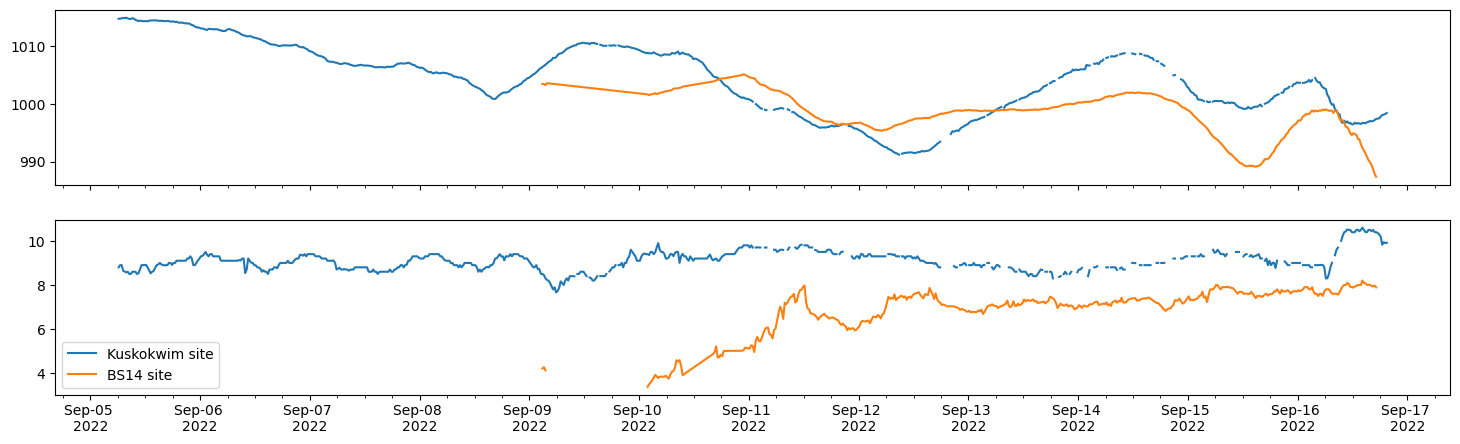

In [39]:
fig, ax = plt.subplots(2,figsize=(18, 5),sharex=True)
ax[0].plot(kudf.index,kudf.air_pressure)
ax[0].plot(bsdf.index,bsdf.air_pressure)
ax[1].plot(kudf.index,kudf.air_temperature,label='Kuskokwim site')
ax[1].plot(bsdf.index,bsdf.air_temperature,label='BS14 site')

ax[1].xaxis.set_major_locator(DayLocator(bymonthday=range(1,18,1)))
ax[1].xaxis.set_minor_locator(HourLocator(byhour=[0,6,12,18]))
ax[1].xaxis.set_minor_formatter(DateFormatter(''))
ax[1].xaxis.set_major_formatter(DateFormatter('%b-%d \n%Y'))
ax[1].xaxis.set_tick_params(which='major', pad=3)
ax[1].xaxis.set_tick_params(which='minor', pad=5)
ax[1].legend()

<Axes: xlabel='time (UTC)'>

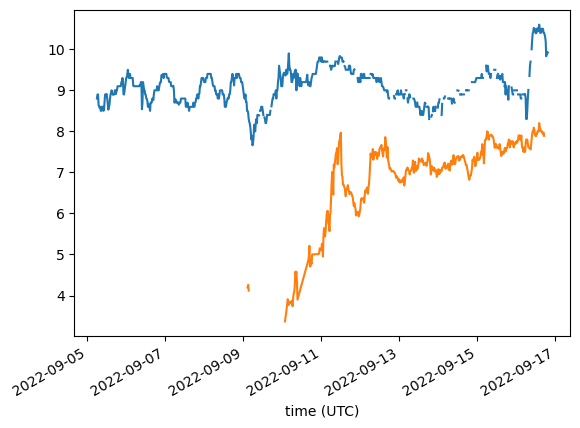

In [5]:
kudf.air_temperature.plot()
bsdf.air_temperature.plot()


In [45]:
kunarr=pd.read_csv('/Users/bell/Downloads/K4_pres.sfc_2022.csv',parse_dates=True,index_col='time')
m14narr=pd.read_csv('/Users/bell/Downloads/M14_pres.sfc_2022.csv',parse_dates=True,index_col='time')

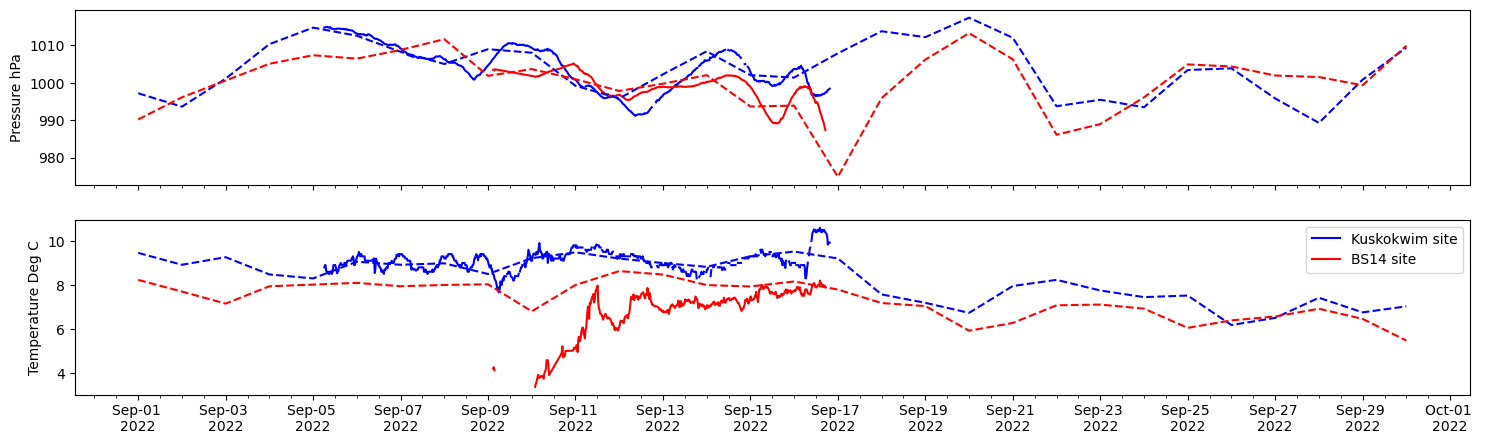

In [71]:
fig, ax = plt.subplots(2,figsize=(18, 5),sharex=True)
ax[0].plot(kudf.index,kudf.air_pressure,'b')
ax[0].plot(bsdf.index,bsdf.air_pressure,'r')
ax[0].plot(kunarr.index,kunarr.pres/100,'b--') 
ax[0].plot(m14narr.index,m14narr.pres/100,'r--') 
ax[1].set_ylabel('Temperature Deg C')
ax[1].plot(kudf.index,kudf.air_temperature,'b',label='Kuskokwim site')
ax[1].plot(bsdf.index,bsdf.air_temperature,'r',label='BS14 site')
ax[1].plot(kunarr.index,kunarr.air-273.15,'b--') 
ax[1].plot(m14narr.index,m14narr.air-273.15,'r--') 
ax[0].set_ylabel('Pressure hPa')

ax[1].xaxis.set_major_locator(DayLocator(bymonthday=range(1,31,2)))
ax[1].xaxis.set_minor_locator(HourLocator(byhour=[0,12]))
ax[1].xaxis.set_minor_formatter(DateFormatter(''))
ax[1].xaxis.set_major_formatter(DateFormatter('%b-%d \n%Y'))
ax[1].xaxis.set_tick_params(which='major', pad=3)
ax[1].xaxis.set_tick_params(which='minor', pad=5)
ax[1].legend()

In [70]:
kudf[['air_temperature','air_pressure']].to_csv('ku4_temp-pres.csv')
bsdf[['air_temperature','air_pressure']].to_csv('bs14_temp-pres.csv')